In [1]:
from utils.data import YfDataLoader, FinancialDataProcessor, Portfolio
from utils.optimization import diversification_ratio, get_weights_md

import matplotlib.pyplot as plt 
import numpy as np

%load_ext autoreload 
%autoreload 2 

In [2]:
# Dataloading 

tickers = ['AGG', 'DBC', 'VTI', '^VIX']
start_date = "2011-01-01"
end_date = "2020-04-30"

fetcher = YfDataLoader(tickers=tickers, start_date=start_date, end_date=end_date)
price_data = fetcher.fetch_data()
preprocessing = FinancialDataProcessor()
returns = preprocessing.calculate_returns(price_data)
lagged_returns = returns.shift(1)

[*********************100%***********************]  4 of 4 completed


In [3]:
md_portfolio = Portfolio(returns_data=returns)
bounds = tuple((0, 1) for _ in range(4))
md_portfolio.optimize_portfolio(bounds=bounds)

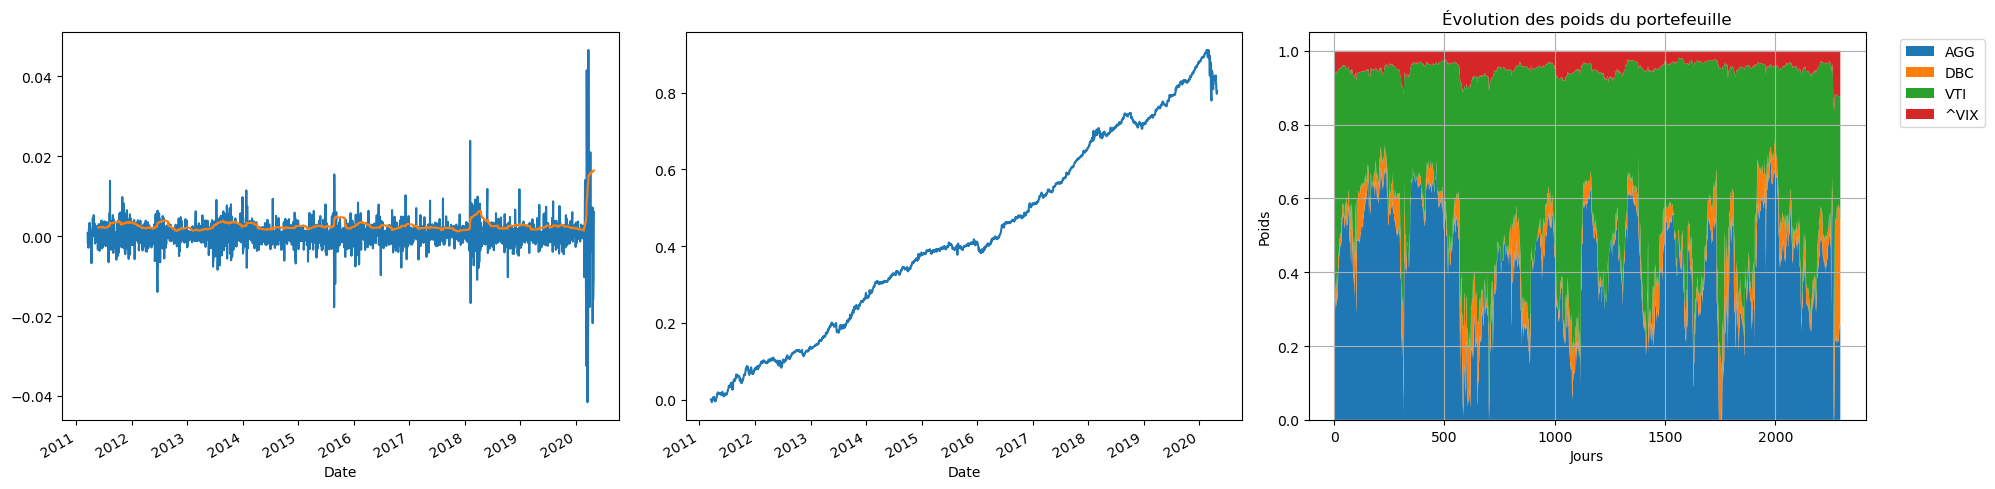

In [4]:
plt.figure(figsize=(20,5))
plt.subplot(131)
md_portfolio.get_portfolio_returns(cost_rate=10**(-4)).plot()
md_portfolio.get_portfolio_vol().plot()
plt.subplot(132)
md_portfolio.get_portfolio_returns(cost_rate=10**(-4)).cumsum().plot()

plt.subplot(133)
weights_df = md_portfolio.dynamic_weights
plt.stackplot(range(weights_df.shape[0]), weights_df.T, labels=tickers)
plt.title('Évolution des poids du portefeuille')
plt.xlabel('Jours')
plt.ylabel('Poids')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

In [5]:
sharpe_y = md_portfolio.get_sharpe_ratio() * np.sqrt(252)
mean_rets_y = md_portfolio.get_portfolio_returns(cost_rate=10**(-4)).mean() * 252
vol_rets_y = md_portfolio.get_portfolio_returns().std() * np.sqrt(252)

print(f"sharpe ratio {sharpe_y:.2f}")
print(f"rendements annualisés {mean_rets_y:.2%}")
print(f"volatilitée annualisés {vol_rets_y:.2%}")

sharpe ratio 1.56
rendements annualisés 8.83%
volatilitée annualisés 5.68%
